In [1]:
import numpy as np
from nice_colorsys import rgb
from glasbeyish import glasbey
from matplotlib.colors import ListedColormap

## Generate a palette with 2 colors

/home/andrew/miniconda3/envs/rna-clique/lib/python3.12/site-packages/glasbeyish/glasbey.py:106: RuntimeWarning: overflow encountered in exp
  if rng.random() <= min(1, np.exp((new_min - old_min)/temperature)):


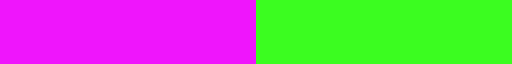

In [2]:
cm = ListedColormap([c.to_rgb() for c in glasbey(2)])
cm

## Generate a palette with 12 colors

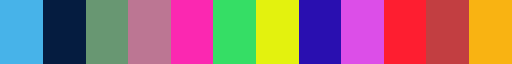

In [3]:
cm = ListedColormap([c.to_rgb() for c in glasbey(12)])
cm

## Use a seed for reproducibility

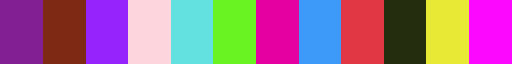

In [4]:
cm = ListedColormap([c.to_rgb() for c in glasbey(12, seed=485)])
cm

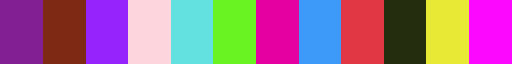

In [5]:
cm = ListedColormap([c.to_rgb() for c in glasbey(12, seed=485)])
cm

## Limit the colors that can be generated

Here, we'll try to make a bluish color palette by discarding colors too far from blue.

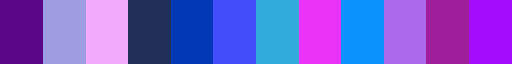

In [6]:
def color_dist(a, b):
    return np.linalg.norm(np.array(a.to_cieluv()) - np.array(b.to_cieluv()))

cm = ListedColormap([c.to_rgb() for c in glasbey(12, seed=485, limit=lambda x: color_dist(x, rgb(0, 0, 1)) < 100)])
cm

## Use a custom random color generator

In this example, we'll generate random colors with only blue components in the RGB color space. `glasbey` expects the generated colors to be in the CIELUV color space and won't automatically convert the colors from RGB to CIELUV for us, so we have to do that ourselves.

In [7]:
rng = np.random.default_rng()

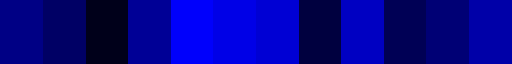

In [8]:
def random_color(rng):
    return rgb(0, 0, rng.random()).to_cieluv()
    
cm = ListedColormap([c.to_rgb().safe() for c in glasbey(12, seed=485, random_color=random_color)])
cm